## 参考
https://carp.cc.it-hiroshima.ac.jp/~tateyama/Lecture/AppEx/PythonClustering.html
<br>
https://aiqlab.com/tech_blog?id=204

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('kouhan2.png' ,1)

In [90]:
from PIL import Image
import numpy as np
from matplotlib import pylab as plt
from scipy import ndimage

img_np=np.array(Image.open("kouhan2.png"))

In [91]:
img_np

array([[[190, 130,  59, 255],
        [188, 133,  57, 255],
        [181, 129,  50, 255],
        ...,
        [193, 160,  64, 255],
        [192, 161,  62, 255],
        [192, 160,  60, 255]],

       [[190, 131,  60, 255],
        [194, 137,  63, 255],
        [196, 138,  64, 255],
        ...,
        [194, 163,  62, 255],
        [192, 166,  62, 255],
        [192, 169,  63, 255]],

       [[176, 125,  48, 255],
        [195, 145,  63, 255],
        [198, 146,  66, 255],
        ...,
        [196, 170,  64, 255],
        [195, 168,  64, 255],
        [193, 163,  64, 255]],

       ...,

       [[180, 143,  48, 255],
        [182, 145,  51, 255],
        [179, 143,  48, 255],
        ...,
        [193, 145,  62, 255],
        [194, 142,  62, 255],
        [195, 147,  63, 255]],

       [[192, 163,  61, 255],
        [193, 163,  61, 255],
        [195, 162,  64, 255],
        ...,
        [194, 146,  62, 255],
        [195, 143,  66, 255],
        [195, 142,  63, 255]],

       [[186

In [92]:
print(img_np.ndim)

3


### 配列の中身
- 行数, 列数, 色(チャンネル、色空間)
- RGBAのAはalpha 透明度

In [93]:
img_np.shape

(207, 277, 4)

In [94]:
Image.fromarray(img_np).mode

'RGBA'

### 解析対象画像イメージ確認

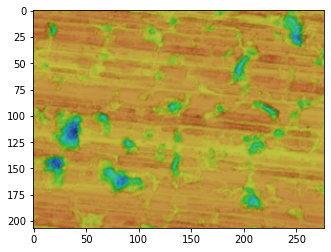

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("kouhan2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(np.array(img))
plt.show()

In [96]:
np.array(img)

array([[[190, 130,  59],
        [188, 133,  57],
        [181, 129,  50],
        ...,
        [193, 160,  64],
        [192, 161,  62],
        [192, 160,  60]],

       [[190, 131,  60],
        [194, 137,  63],
        [196, 138,  64],
        ...,
        [194, 163,  62],
        [192, 166,  62],
        [192, 169,  63]],

       [[176, 125,  48],
        [195, 145,  63],
        [198, 146,  66],
        ...,
        [196, 170,  64],
        [195, 168,  64],
        [193, 163,  64]],

       ...,

       [[180, 143,  48],
        [182, 145,  51],
        [179, 143,  48],
        ...,
        [193, 145,  62],
        [194, 142,  62],
        [195, 147,  63]],

       [[192, 163,  61],
        [193, 163,  61],
        [195, 162,  64],
        ...,
        [194, 146,  62],
        [195, 143,  66],
        [195, 142,  63]],

       [[186, 148,  56],
        [189, 147,  56],
        [189, 146,  57],
        ...,
        [194, 141,  63],
        [195, 139,  63],
        [198, 142,  66]]

### 次元削減
- RGBAをRGBにするのが目的？

In [97]:
flatten=img.reshape(-1,3)

In [98]:
flatten

array([[190, 130,  59],
       [188, 133,  57],
       [181, 129,  50],
       ...,
       [194, 141,  63],
       [195, 139,  63],
       [198, 142,  66]], dtype=uint8)

### クラスタリング
- クラスタ数を増やして色の種別を増やした．
- クラスタNoを組み合わせて目視で検討．1,5,4を組み合わせればよさそう．

In [99]:
from sklearn.cluster import KMeans
pred=KMeans(n_clusters=8,random_state=1).fit(flatten)

In [100]:
out = zip(pred.labels_, flatten)
# 赤系のクラスタ
clu0 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==0])
# 緑系のクラスタ
clu1 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==1])
# 青系のクラスタ
clu2 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==2])

clu3 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==3])

clu4 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==4])
# 緑系のクラスタ
clu5 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==5])
# 青系のクラスタ
clu6 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==6])

clu7 = np.array([data.tolist() for label, data in zip(pred.labels_,flatten) if label==7])

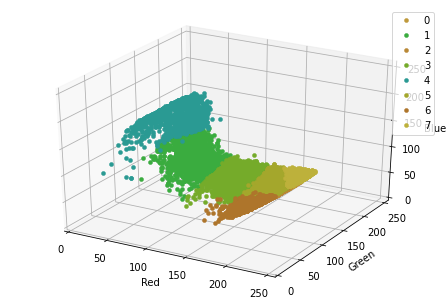

In [101]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
color0 = pred.cluster_centers_[0] / 255
color1 = pred.cluster_centers_[1] / 255
color2 = pred.cluster_centers_[2] / 255
color3 = pred.cluster_centers_[3] / 255
color4 = pred.cluster_centers_[4] / 255
color5 = pred.cluster_centers_[5] / 255
color6 = pred.cluster_centers_[6] / 255
color7 = pred.cluster_centers_[7] / 255
fig=pyplot.figure()
ax=Axes3D(fig)

ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
# 表示範囲の設定
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.plot(clu0[:,0], clu0[:,1], clu0[:,2], "o", color=color0, ms=4, mew=0.5,label=0)
ax.plot(clu1[:,0], clu1[:,1], clu1[:,2], "o", color=color1, ms=4, mew=0.5,label=1)
ax.plot(clu2[:,0], clu2[:,1], clu2[:,2], "o", color=color2, ms=4, mew=0.5,label=2)
ax.plot(clu3[:,0], clu3[:,1], clu3[:,2], "o", color=color3, ms=4, mew=0.5,label=3)
ax.plot(clu4[:,0], clu4[:,1], clu4[:,2], "o", color=color4, ms=4, mew=0.5,label=4)
ax.plot(clu5[:,0], clu5[:,1], clu5[:,2], "o", color=color5, ms=4, mew=0.5,label=5)
ax.plot(clu6[:,0], clu6[:,1], clu6[:,2], "o", color=color6, ms=4, mew=0.5,label=6)
ax.plot(clu7[:,0], clu7[:,1], clu7[:,2], "o", color=color7, ms=4, mew=0.5,label=7)

ax.legend()
pyplot.show()

In [119]:
#a=np.where(np.logical_or(pred.labels_==1,pred.labels_==5,pred.labels_==4),256,0)
#a=np.where(np.logical_or(np.logical_or(pred.labels_==1,pred.labels_==3),pred.labels_==4),256,0)
a=np.where(np.logical_or(np.logical_or(np.logical_or(pred.labels_==1,pred.labels_==3),pred.labels_==4),pred.labels_==5),256,0)


In [120]:
result=a.reshape([207,277])

In [121]:
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [122]:
import numpy as np
from PIL import Image
pil_image=Image.fromarray(result)
pil_image.show()

In [123]:
image = Image.fromarray(result)
pil_image.save("test_kouhan2.png") 

In [124]:
print(result)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


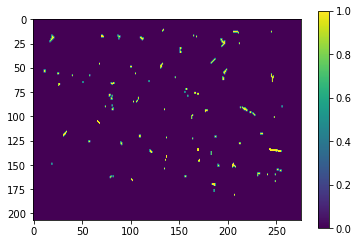

84
[[207.         180.5       ]
 [186.         176.        ]
 [185.66666667 169.77777778]
 [249.         166.5       ]
 [101.5        165.        ]
 [156.5        161.5       ]
 [ 82.         161.5       ]
 [ 79.5        162.        ]
 [249.         159.5       ]
 [241.         159.5       ]
 [231.66666667 159.11111111]
 [254.5        155.5       ]
 [251.5        154.5       ]
 [135.         153.5       ]
 [190.4        150.2       ]
 [206.18181818 150.36363636]
 [ 19.         148.5       ]
 [170.6        145.2       ]
 [136.         144.5       ]
 [137.         141.        ]
 [183.         137.5       ]
 [120.85714286 135.71428571]
 [249.         134.73076923]
 [169.5        134.        ]
 [212.5        127.5       ]
 [ 90.5        127.5       ]
 [ 57.5        125.5       ]
 [164.         122.5       ]
 [137.         121.5       ]
 [187.5        120.5       ]
 [109.5        120.        ]
 [235.         117.5       ]
 [ 32.4        117.5       ]
 [ 67.         105.5       ]
 [248.     

In [125]:
#binimg = (img_chs[2]>100)
binimg = (result)
binimg=(result>100)
binimg = binimg.astype(np.uint8)
print(binimg)
distmap = cv2.distanceTransform(binimg,1,3)

out = distmap*0
ksize=10
for x in range(ksize,distmap.shape[0]-ksize*2):
    for y in range(ksize,distmap.shape[1]-ksize*2):
        if distmap[x,y]>0 and distmap[x,y]==np.max(distmap[x-ksize:x+ksize,y-ksize:y+ksize]):
            out[x,y]=1
            
out = cv2.dilate(out,(3,3))

contours, _ = cv2.findContours(out.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

arr=[]
for i in contours:
    x_=0
    y_=0
    for j in i:
        x_ += j[0][0]
        y_ += j[0][1]
    arr.append([x_/len(i), y_/len(i)])
arr = np.array(arr)
                
plt.imshow(out[0:207,0:276])
plt.colorbar()
plt.show()

print(len(arr))
print(arr)

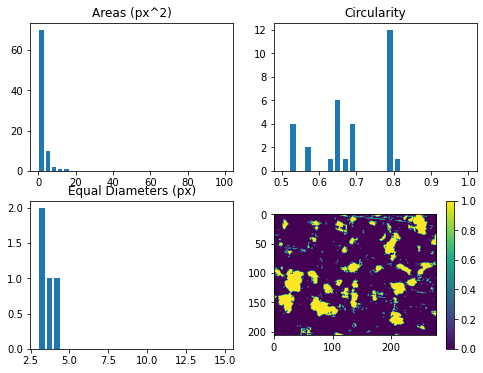

In [126]:
"""
https://qiita.com/kon2/items/a0c4fbf9bb2063e9fb0e
"""
#面積、円形度、等価直径を求める。
Areas = []
Circularities = []
Eq_diameters = []
#__, cnt= cv2.findContours(out.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in contours:
#for i in cnt:
    #面積(px*px)
    area = cv2.contourArea(i)
    Areas.append(area)

    #円形度
    arc = cv2.arcLength(i, True)
    circularity = 4 * np.pi * area / (arc * arc)
    Circularities.append(circularity)

    #等価直径(px)
    eq_diameter = np.sqrt(4*area/np.pi)
    Eq_diameters.append(eq_diameter)

fig = plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title("Areas (px^2)")
plt.hist(Areas, bins=30, range=(0,100), rwidth=0.7)
plt.subplot(2,2,2)
plt.title("Circularity")
plt.hist(Circularities, bins=25, range=(0.5,1), rwidth=0.7)
plt.subplot(2,2,3)
plt.title("Equal Diameters (px)")
plt.hist(Eq_diameters, bins=25, range=(3.0, 15.0), rwidth=0.7)

plt.subplot(2,2,4)
plt.imshow(binimg)
#plt.imshow(out[:])
plt.colorbar()
plt.show()
